# **Assignment 3 - RNN - Time-Series Data**

# **Group - 10**

**A Temperature-forecasting example- Data Upload from Amazon Web Services (AWS) /keras**

In [1]:
!pip install tensorflow==2.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalli

In [3]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2024-04-08 16:02:19--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.58.208, 52.217.64.126, 54.231.129.152, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.58.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  39.1MB/s    in 0.3s    

2024-04-08 16:02:20 (39.1 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


**Inspecting the data of the Jena weather dataset - 420451 rows and 15 Features**

In [4]:
import os
fname = os.path.join("jena_climate_2009_2016.csv")

with open(fname) as f:
    data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]
print(header)
print(len(lines))

num_variables = len(header)
print("Number of variables:", num_variables)
num_rows = len(lines)
print("Number of rows:", num_rows)

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451
Number of variables: 15
Number of rows: 420451


**After Inspecting the data, specific values are stored in the temperature and raw_data arrays for later processing or analysis. The comma-separated values are transformed to floating point numbers.**

In [5]:
import numpy as np
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    temperature[i] = values[1]
    raw_data[i, :] = values[:]

**Plotting the graphical representation for temperature timeseries**

Text(0, 0.5, 'Temperature')

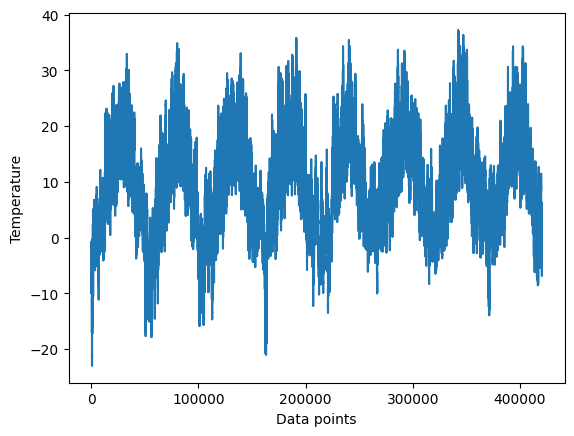

In [6]:
from matplotlib import pyplot as plt
plt.plot(range(len(temperature)), temperature)
plt.xlabel('Data points')
plt.ylabel('Temperature')

**Plotting the temperature time series for the first ten days: With 144 data points collected in a single day, 10 days will yield 1440 data points.**

Text(0, 0.5, 'Temperature')

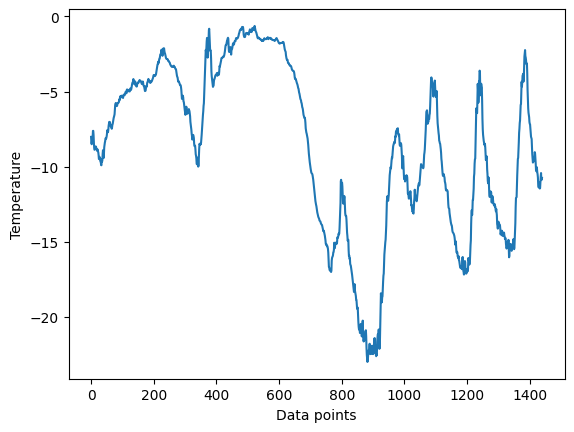

In [7]:
plt.plot(range(1440), temperature[:1440])
plt.xlabel('Data points')
plt.ylabel('Temperature')

**Calculating the number of samples we'll use for each data split 50% designated for training and 25% for validation**

In [8]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 210225
num_val_samples: 105112
num_test_samples: 105114


### **Preparing the data**

**Normalizing the data: Vectorization is not required because the data is already numerically represented. Nonetheless, it is recommended to normalize all variables because the data scales differ, with temperature ranging from -20 to +30 and pressure measured in millibars..**

In [9]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

In [10]:
import numpy as np
from tensorflow import keras
int_sequence = np.arange(10)
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],
    targets=int_sequence[3:],
    sequence_length=3,
    batch_size=2,
)

for inputs, targets in dummy_dataset:
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))

[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


**Generating training, validation, and testing datasets**

In [11]:
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

**Inspecting the output of one of this datasets**

In [12]:
for samples, targets in train_dataset:
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break

samples shape: (256, 120, 14)
targets shape: (256,)


### **A common-sense, non-machine-learning baseline**

**Calculating the common sense baseline. MAE: The "evaluate_naive_method" function provides a starting point for evaluating the effectiveness of a basic forecasting strategy that uses the final value in the input sequence to estimate the next value.**

In [13]:
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")

Validation MAE: 2.44
Test MAE: 2.62


The common-sense baseline strategy is to forecast that the temperature in 24 hours will be the same as the current temperature. Using this simple baseline, the validation MAE (Mean Absolute Error) is 2.44 degrees Celsius, while the test MAE is 2.62 degrees Celsius. In other words, assuming that the future temperature remains constant, the average variance would be about two and a half degrees.

### **A basic machine-learning model - Dense Layer**

**Training and evaluating a densely connected model**

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [15]:
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.keras",
                                    save_best_only=True)]

In [16]:
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

In [17]:
history = model.fit(train_dataset, epochs=10,
                    validation_data = val_dataset, callbacks=callbacks)

Epoch 1/10
819/819 [==============================] - 67s 80ms/step - loss: 12.3279 - mae: 2.7247 - val_loss: 10.3413 - val_mae: 2.5408
Epoch 2/10
819/819 [==============================] - 52s 63ms/step - loss: 9.0656 - mae: 2.3671 - val_loss: 14.3823 - val_mae: 3.0342
Epoch 3/10
819/819 [==============================] - 56s 68ms/step - loss: 8.3426 - mae: 2.2693 - val_loss: 11.2642 - val_mae: 2.6588
Epoch 4/10
819/819 [==============================] - 53s 64ms/step - loss: 7.8461 - mae: 2.1987 - val_loss: 10.4404 - val_mae: 2.5628
Epoch 5/10
819/819 [==============================] - 52s 64ms/step - loss: 7.5175 - mae: 2.1534 - val_loss: 11.3686 - val_mae: 2.6657
Epoch 6/10
819/819 [==============================] - 57s 70ms/step - loss: 7.2895 - mae: 2.1209 - val_loss: 11.1448 - val_mae: 2.6385
Epoch 7/10
819/819 [==============================] - 54s 65ms/step - loss: 7.0935 - mae: 2.0908 - val_loss: 11.1316 - val_mae: 2.6320
Epoch 8/10
819/819 [==============================] - 

In [18]:
model = keras.models.load_model("jena_dense.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

405/405 [==============================] - 17s 41ms/step - loss: 11.4494 - mae: 2.6524
Test MAE: 2.65


**Plotting the results**

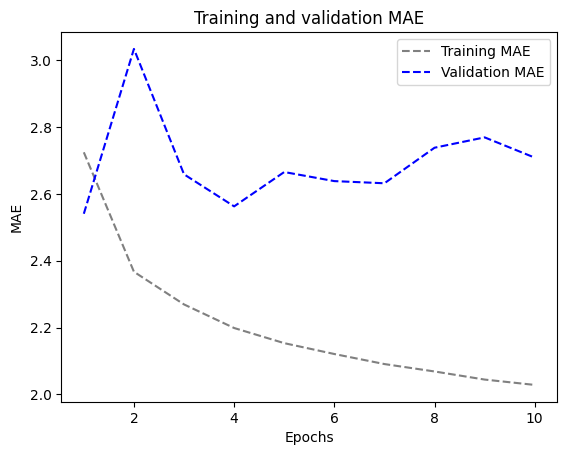

In [19]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]

epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epochs,  val_loss, color="blue",linestyle="dashed", label="Validation MAE")
plt.title("Training and validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

### **we'll attempt a 1D convolutional model first.**

In [20]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Conv1D(8, 24, activation="relu")(inputs)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 12, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 6, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_conv.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_conv.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 88s 105ms/step - loss: 24.8768 - mae: 3.8209 - val_loss: 15.0230 - val_mae: 3.0605
Epoch 2/10
819/819 [==============================] - 87s 105ms/step - loss: 15.2857 - mae: 3.1007 - val_loss: 15.4247 - val_mae: 3.0929
Epoch 3/10
819/819 [==============================] - 88s 107ms/step - loss: 14.0077 - mae: 2.9725 - val_loss: 15.8064 - val_mae: 3.1631
Epoch 4/10
819/819 [==============================] - 86s 105ms/step - loss: 13.2453 - mae: 2.8906 - val_loss: 15.1340 - val_mae: 3.0736
Epoch 5/10
819/819 [==============================] - 89s 108ms/step - loss: 12.6018 - mae: 2.8177 - val_loss: 14.6505 - val_mae: 3.0284
Epoch 6/10
819/819 [==============================] - 84s 103ms/step - loss: 12.0375 - mae: 2.7503 - val_loss: 15.3763 - val_mae: 3.1062
Epoch 7/10
819/819 [==============================] - 87s 106ms/step - loss: 11.5648 - mae: 2.6889 - val_loss: 14.4824 - val_mae: 3.0149
Epoch 8/10
819/819 [=====================

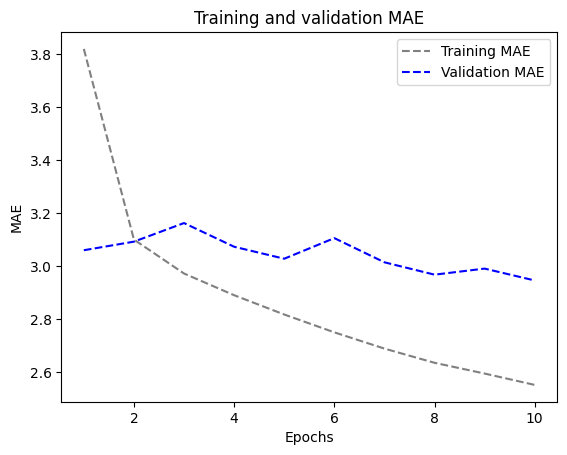

In [21]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]

epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epochs,  val_loss, color="blue",linestyle="dashed", label="Validation MAE")
plt.title("Training and validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

Convolutional data appear to perform worse than dense models or common sense. It might be due to
-Weather data does not conform to the assumption of translation invariance. The order in which the data is presented is important. When it comes to estimating the temperature for the following day, recent past data is substantially more informative than data obtained several days ago. Unfortunately, a one-dimensional convolutional neural network cannot capture this critical order of time well..





## **A Simple RNN**

### **1.An RNN layer that can process sequences of any length**

In [22]:
num_features = 14
inputs = keras.Input(shape=(None, num_features))
outputs = layers.SimpleRNN(16)(inputs)

model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_SimRNN.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_SimRNN.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 74s 89ms/step - loss: 139.1008 - mae: 9.7118 - val_loss: 144.0390 - val_mae: 9.9021
Epoch 2/10
819/819 [==============================] - 74s 90ms/step - loss: 136.5197 - mae: 9.5746 - val_loss: 143.8109 - val_mae: 9.8785
Epoch 3/10
819/819 [==============================] - 88s 107ms/step - loss: 136.2962 - mae: 9.5541 - val_loss: 143.7273 - val_mae: 9.8734
Epoch 4/10
819/819 [==============================] - 74s 90ms/step - loss: 136.2446 - mae: 9.5477 - val_loss: 143.6372 - val_mae: 9.8614
Epoch 5/10
819/819 [==============================] - 75s 92ms/step - loss: 136.1528 - mae: 9.5375 - val_loss: 143.5836 - val_mae: 9.8540
Epoch 6/10
819/819 [==============================] - 74s 89ms/step - loss: 136.1266 - mae: 9.5345 - val_loss: 143.5898 - val_mae: 9.8559
Epoch 7/10
819/819 [==============================] - 73s 89ms/step - loss: 136.1154 - mae: 9.5339 - val_loss: 143.5630 - val_mae: 9.8524
Epoch 8/10
819/819 [=============

### **2.Simple RNN - Stacking RNN layers**
* Stacked SimpleRNN layers with increasing units ( 14, 14) process sequential data.
* RMSprop optimizer is used with Mean Squared Error (MSE) loss and Mean Absolute Error (MAE) metric.


In [23]:
num_features = 14
steps = 120
inputs = keras.Input(shape=(steps, num_features))
x = layers.SimpleRNN(16, return_sequences=True)(inputs)
x = layers.SimpleRNN(16, return_sequences=True)(x)
outputs = layers.SimpleRNN(16)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_SRNN2.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_SRNN2.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")


Epoch 1/10
819/819 [==============================] - 160s 188ms/step - loss: 136.7434 - mae: 9.5610 - val_loss: 143.3921 - val_mae: 9.8306
Epoch 2/10
819/819 [==============================] - 129s 158ms/step - loss: 135.9407 - mae: 9.5099 - val_loss: 143.5119 - val_mae: 9.8467
Epoch 3/10
819/819 [==============================] - 132s 160ms/step - loss: 135.8973 - mae: 9.5041 - val_loss: 143.4196 - val_mae: 9.8378
Epoch 4/10
819/819 [==============================] - 145s 177ms/step - loss: 135.8585 - mae: 9.4986 - val_loss: 143.4881 - val_mae: 9.8492
Epoch 5/10
819/819 [==============================] - 128s 156ms/step - loss: 135.8365 - mae: 9.4948 - val_loss: 143.4210 - val_mae: 9.8387
Epoch 6/10
819/819 [==============================] - 146s 179ms/step - loss: 135.8218 - mae: 9.4930 - val_loss: 143.5286 - val_mae: 9.8542
Epoch 7/10
819/819 [==============================] - 146s 178ms/step - loss: 135.8066 - mae: 9.4904 - val_loss: 143.4942 - val_mae: 9.8516
Epoch 8/10
819/819 [

 A simpleRNN with two layer has a MAE of 9.90


\## **A Simple GRU (Gated Recurrent Unit)**



In [24]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.GRU(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_gru.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_gru.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 134s 159ms/step - loss: 39.5470 - mae: 4.5565 - val_loss: 11.9130 - val_mae: 2.5958
Epoch 2/10
819/819 [==============================] - 129s 158ms/step - loss: 10.4367 - mae: 2.5141 - val_loss: 9.6117 - val_mae: 2.3926
Epoch 3/10
819/819 [==============================] - 128s 156ms/step - loss: 9.4793 - mae: 2.4048 - val_loss: 9.7162 - val_mae: 2.3981
Epoch 4/10
819/819 [==============================] - 109s 133ms/step - loss: 9.1924 - mae: 2.3654 - val_loss: 9.5391 - val_mae: 2.3742
Epoch 5/10
819/819 [==============================] - 108s 131ms/step - loss: 8.9557 - mae: 2.3348 - val_loss: 10.0200 - val_mae: 2.4104
Epoch 6/10
819/819 [==============================] - 125s 153ms/step - loss: 8.7575 - mae: 2.3111 - val_loss: 9.6091 - val_mae: 2.3719
Epoch 7/10
819/819 [==============================] - 128s 156ms/step - loss: 8.5762 - mae: 2.2892 - val_loss: 9.5284 - val_mae: 2.3727
Epoch 8/10
819/819 [========================

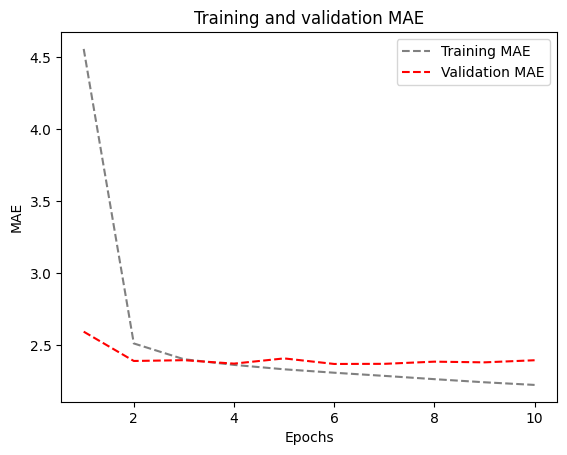

In [25]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]

epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epochs,  val_loss, color="red",linestyle="dashed", label="Validation MAE")
plt.title("Training and validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

## **LSTM(Long Short-Term Memory )**

### **1.LSTM-Simple**

In [26]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_lstm.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 109s 130ms/step - loss: 46.1355 - mae: 4.9759 - val_loss: 13.5917 - val_mae: 2.7997
Epoch 2/10
819/819 [==============================] - 128s 156ms/step - loss: 11.3182 - mae: 2.6025 - val_loss: 9.7433 - val_mae: 2.4377
Epoch 3/10
819/819 [==============================] - 128s 155ms/step - loss: 9.8083 - mae: 2.4364 - val_loss: 9.4774 - val_mae: 2.3924
Epoch 4/10
819/819 [==============================] - 108s 132ms/step - loss: 9.2604 - mae: 2.3727 - val_loss: 9.4112 - val_mae: 2.3742
Epoch 5/10
819/819 [==============================] - 126s 153ms/step - loss: 8.8723 - mae: 2.3268 - val_loss: 9.4437 - val_mae: 2.3734
Epoch 6/10
819/819 [==============================] - 111s 135ms/step - loss: 8.5322 - mae: 2.2817 - val_loss: 9.5459 - val_mae: 2.3916
Epoch 7/10
819/819 [==============================] - 110s 134ms/step - loss: 8.2569 - mae: 2.2485 - val_loss: 9.5145 - val_mae: 2.3893
Epoch 8/10
819/819 [=========================

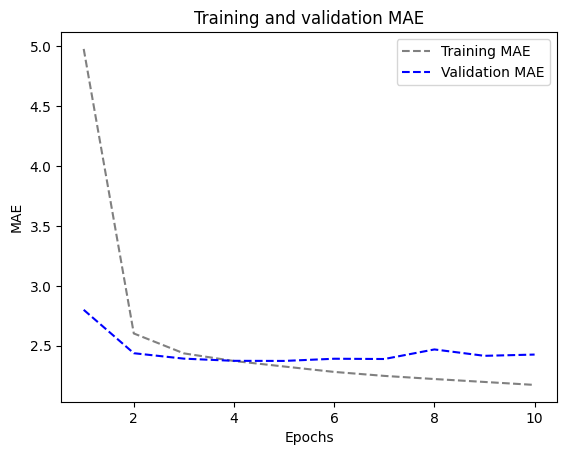

In [27]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]

epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epochs,  val_loss, color="blue",linestyle="dashed", label="Validation MAE")
plt.title("Training and validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

### **2.LSTM - dropout Regularization**

In [28]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16, recurrent_dropout=0.25)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_lstm_dropout.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 193s 232ms/step - loss: 50.5023 - mae: 5.2921 - val_loss: 14.0696 - val_mae: 2.8309
Epoch 2/10
819/819 [==============================] - 170s 207ms/step - loss: 20.1604 - mae: 3.4522 - val_loss: 10.7233 - val_mae: 2.5130
Epoch 3/10
819/819 [==============================] - 172s 210ms/step - loss: 18.3574 - mae: 3.2998 - val_loss: 9.7014 - val_mae: 2.4351
Epoch 4/10
819/819 [==============================] - 187s 228ms/step - loss: 17.4780 - mae: 3.2222 - val_loss: 9.8337 - val_mae: 2.4514
Epoch 5/10
819/819 [==============================] - 187s 228ms/step - loss: 16.9700 - mae: 3.1734 - val_loss: 9.3409 - val_mae: 2.3899
Epoch 6/10
819/819 [==============================] - 188s 230ms/step - loss: 16.4872 - mae: 3.1325 - val_loss: 9.2639 - val_mae: 2.3763
Epoch 7/10
819/819 [==============================] - 188s 229ms/step - loss: 16.0194 - mae: 3.0891 - val_loss: 9.3448 - val_mae: 2.3846
Epoch 8/10
819/819 [===================

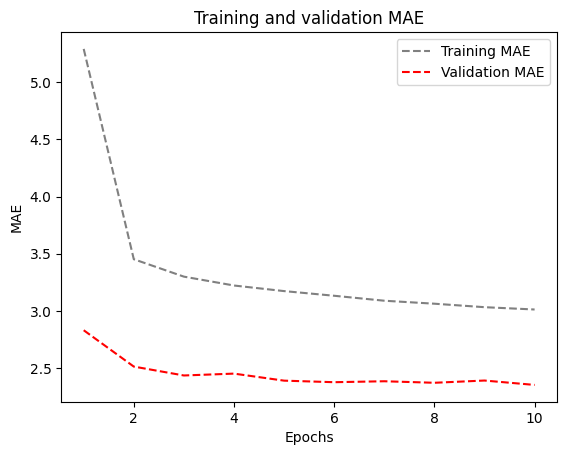

In [29]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]

epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epochs,  val_loss, color="red",linestyle="dashed", label="Validation MAE")
plt.title("Training and validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

### **3.LSTM - Stacked setup with 16 units**

In [30]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16, return_sequences=True)(inputs)
x = layers.LSTM(16)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_LSTM_stacked1.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)
model = keras.models.load_model("jena_LSTM_stacked1.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 190s 227ms/step - loss: 35.6446 - mae: 4.3344 - val_loss: 11.7511 - val_mae: 2.6050
Epoch 2/10
819/819 [==============================] - 185s 226ms/step - loss: 9.8278 - mae: 2.4363 - val_loss: 9.5037 - val_mae: 2.4009
Epoch 3/10
819/819 [==============================] - 186s 227ms/step - loss: 8.4503 - mae: 2.2691 - val_loss: 10.0366 - val_mae: 2.4695
Epoch 4/10
819/819 [==============================] - 187s 228ms/step - loss: 7.8028 - mae: 2.1806 - val_loss: 9.7446 - val_mae: 2.4347
Epoch 5/10
819/819 [==============================] - 177s 216ms/step - loss: 7.3276 - mae: 2.1143 - val_loss: 10.3941 - val_mae: 2.5063
Epoch 6/10
819/819 [==============================] - 177s 216ms/step - loss: 6.8883 - mae: 2.0493 - val_loss: 10.6075 - val_mae: 2.5297
Epoch 7/10
819/819 [==============================] - 187s 227ms/step - loss: 6.5168 - mae: 1.9930 - val_loss: 10.9730 - val_mae: 2.5822
Epoch 8/10
819/819 [======================

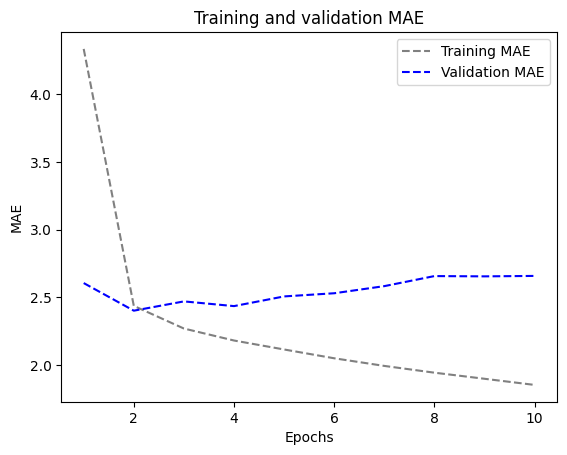

In [32]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]

epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epochs,  val_loss, color="blue",linestyle="dashed", label="Validation MAE")
plt.title("Training and validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

### **4.LSTM - Stacked setup with 32 units**

In [33]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32, return_sequences=True)(inputs)
x = layers.LSTM(32)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_LSTM_stacked2.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)
model = keras.models.load_model("jena_LSTM_stacked2.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 289s 337ms/step - loss: 20.5646 - mae: 3.2552 - val_loss: 10.1024 - val_mae: 2.4611
Epoch 2/10
819/819 [==============================] - 296s 361ms/step - loss: 8.0181 - mae: 2.1988 - val_loss: 10.5568 - val_mae: 2.5104
Epoch 3/10
819/819 [==============================] - 296s 360ms/step - loss: 6.5299 - mae: 1.9772 - val_loss: 10.9067 - val_mae: 2.5539
Epoch 4/10
819/819 [==============================] - 296s 361ms/step - loss: 5.4317 - mae: 1.7995 - val_loss: 11.4266 - val_mae: 2.6375
Epoch 5/10
819/819 [==============================] - 304s 371ms/step - loss: 4.6422 - mae: 1.6541 - val_loss: 11.9881 - val_mae: 2.7035
Epoch 6/10
819/819 [==============================] - 300s 366ms/step - loss: 4.0481 - mae: 1.5423 - val_loss: 12.5151 - val_mae: 2.7635
Epoch 7/10
819/819 [==============================] - 272s 332ms/step - loss: 3.6181 - mae: 1.4570 - val_loss: 13.0589 - val_mae: 2.8302
Epoch 8/10
819/819 [====================

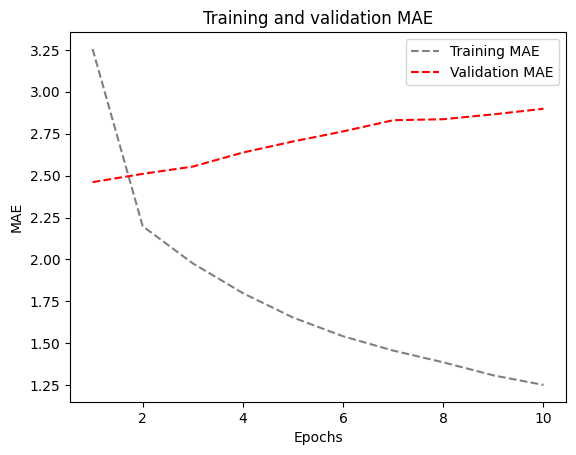

In [34]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]

epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epochs,  val_loss, color="red",linestyle="dashed", label="Validation MAE")
plt.title("Training and validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

### **5.LSTM - Stacked setup with 8 units**

In [35]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(8, return_sequences=True)(inputs)
x = layers.LSTM(8)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_LSTM_stacked3.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)
model = keras.models.load_model("jena_LSTM_stacked3.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 168s 199ms/step - loss: 80.4919 - mae: 6.9490 - val_loss: 43.6278 - val_mae: 4.9642
Epoch 2/10
819/819 [==============================] - 170s 208ms/step - loss: 25.4033 - mae: 3.7053 - val_loss: 16.4469 - val_mae: 3.0123
Epoch 3/10
819/819 [==============================] - 159s 194ms/step - loss: 12.0038 - mae: 2.6634 - val_loss: 10.1599 - val_mae: 2.4749
Epoch 4/10
819/819 [==============================] - 159s 194ms/step - loss: 10.0785 - mae: 2.4659 - val_loss: 9.6579 - val_mae: 2.4113
Epoch 5/10
819/819 [==============================] - 160s 195ms/step - loss: 9.7105 - mae: 2.4175 - val_loss: 9.0640 - val_mae: 2.3464
Epoch 6/10
819/819 [==============================] - 160s 195ms/step - loss: 9.5156 - mae: 2.3947 - val_loss: 9.3260 - val_mae: 2.3728
Epoch 7/10
819/819 [==============================] - 169s 205ms/step - loss: 9.3437 - mae: 2.3732 - val_loss: 9.1714 - val_mae: 2.3514
Epoch 8/10
819/819 [=====================

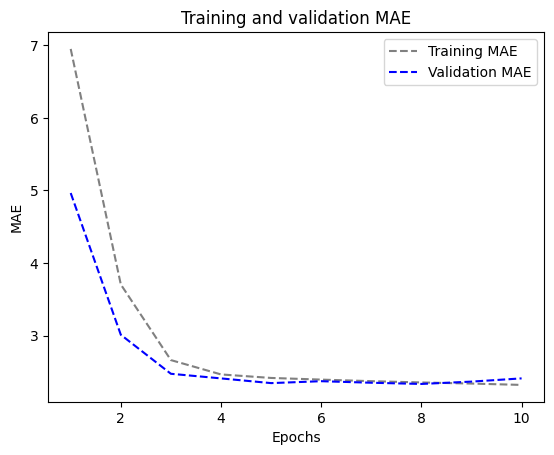

In [36]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]

epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epochs,  val_loss, color="blue",linestyle="dashed", label="Validation MAE")
plt.title("Training and validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

### **6.LSTM - dropout-regularized, stacked model**

In [37]:


inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(8, recurrent_dropout=0.5, return_sequences=True)(inputs)
x = layers.LSTM(8, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_stacked_LSTM_dropout.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)
model = keras.models.load_model("jena_stacked_LSTM_dropout.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 289s 343ms/step - loss: 74.5529 - mae: 6.6228 - val_loss: 33.1815 - val_mae: 4.2641
Epoch 2/10
819/819 [==============================] - 283s 345ms/step - loss: 31.0850 - mae: 4.1720 - val_loss: 13.4745 - val_mae: 2.7395
Epoch 3/10
819/819 [==============================] - 282s 343ms/step - loss: 24.4275 - mae: 3.7416 - val_loss: 10.7940 - val_mae: 2.5139
Epoch 4/10
819/819 [==============================] - 280s 342ms/step - loss: 22.5763 - mae: 3.6069 - val_loss: 10.1827 - val_mae: 2.4628
Epoch 5/10
819/819 [==============================] - 286s 349ms/step - loss: 21.2370 - mae: 3.5019 - val_loss: 9.7306 - val_mae: 2.4093
Epoch 6/10
819/819 [==============================] - 271s 331ms/step - loss: 20.2210 - mae: 3.4244 - val_loss: 9.4109 - val_mae: 2.3758
Epoch 7/10
819/819 [==============================] - 265s 323ms/step - loss: 19.3058 - mae: 3.3445 - val_loss: 9.7461 - val_mae: 2.4095
Epoch 8/10
819/819 [=================

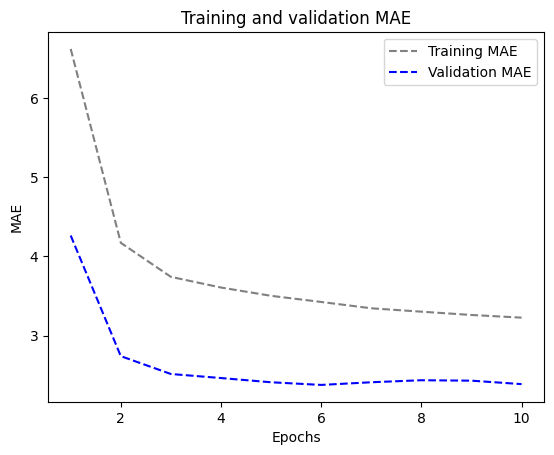

In [38]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]

epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epochs,  val_loss, color="blue",linestyle="dashed", label="Validation MAE")
plt.title("Training and validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

## **Bidirectional LSTM**

In [39]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Bidirectional(layers.LSTM(16))(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_bidirec_LSTM.keras",
                                    save_best_only=True)
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                     callbacks=callbacks)

model = keras.models.load_model("jena_bidirec_LSTM.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")


Epoch 1/10
819/819 [==============================] - 176s 209ms/step - loss: 26.1409 - mae: 3.6934 - val_loss: 10.7851 - val_mae: 2.5606
Epoch 2/10
819/819 [==============================] - 169s 206ms/step - loss: 9.6015 - mae: 2.4140 - val_loss: 9.7461 - val_mae: 2.4034
Epoch 3/10
819/819 [==============================] - 168s 205ms/step - loss: 8.7093 - mae: 2.3001 - val_loss: 10.3606 - val_mae: 2.4680
Epoch 4/10
819/819 [==============================] - 160s 195ms/step - loss: 8.1702 - mae: 2.2284 - val_loss: 10.7940 - val_mae: 2.5135
Epoch 5/10
819/819 [==============================] - 171s 209ms/step - loss: 7.7944 - mae: 2.1776 - val_loss: 10.5363 - val_mae: 2.4913
Epoch 6/10
819/819 [==============================] - 171s 209ms/step - loss: 7.5104 - mae: 2.1398 - val_loss: 10.4645 - val_mae: 2.4982
Epoch 7/10
819/819 [==============================] - 171s 208ms/step - loss: 7.2343 - mae: 2.1006 - val_loss: 10.9244 - val_mae: 2.5495
Epoch 8/10
819/819 [=====================

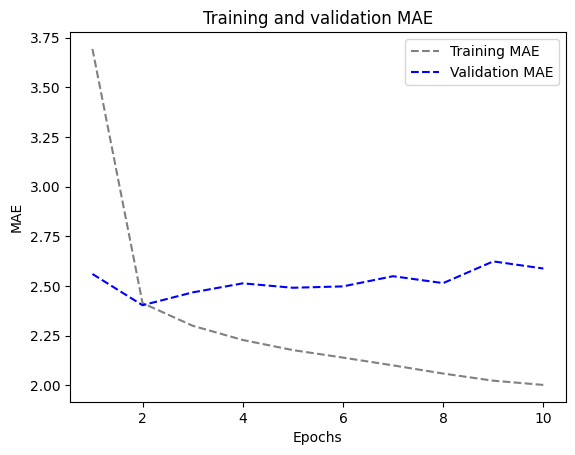

In [40]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]

epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epochs,  val_loss, color="blue",linestyle="dashed", label="Validation MAE")
plt.title("Training and validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

### **1D Convnets and LSTM togther**

In [41]:

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Conv1D(64, 3, activation='relu')(inputs)
x = layers.MaxPooling1D(3)(x)
x = layers.Conv1D(128, 3, activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Reshape((-1, 128))(x)  # Reshape the data to be 3D
x = layers.LSTM(16)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_Conv_LSTM.keras", save_best_only=True)
]

history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)

model = keras.models.load_model("jena_Conv_LSTM.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 127s 152ms/step - loss: 52.5660 - mae: 5.4281 - val_loss: 27.7129 - val_mae: 4.0673
Epoch 2/10
819/819 [==============================] - 139s 170ms/step - loss: 17.9697 - mae: 3.2734 - val_loss: 22.2684 - val_mae: 3.6903
Epoch 3/10
819/819 [==============================] - 138s 168ms/step - loss: 14.6088 - mae: 2.9679 - val_loss: 26.3144 - val_mae: 4.0073
Epoch 4/10
819/819 [==============================] - 122s 149ms/step - loss: 12.8884 - mae: 2.7835 - val_loss: 23.1844 - val_mae: 3.8187
Epoch 5/10
819/819 [==============================] - 140s 171ms/step - loss: 11.7555 - mae: 2.6530 - val_loss: 25.6090 - val_mae: 3.9913
Epoch 6/10
819/819 [==============================] - 122s 149ms/step - loss: 10.9404 - mae: 2.5524 - val_loss: 24.9357 - val_mae: 4.0139
Epoch 7/10
819/819 [==============================] - 140s 170ms/step - loss: 10.2731 - mae: 2.4672 - val_loss: 24.8969 - val_mae: 3.9906
Epoch 8/10
819/819 [==============

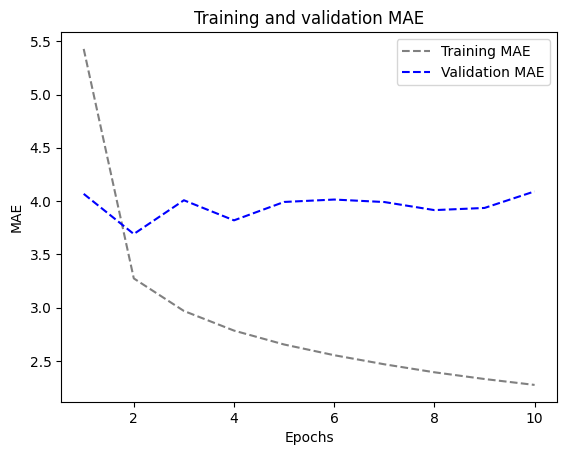

In [42]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]

epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epochs,  val_loss, color="blue",linestyle="dashed", label="Validation MAE")
plt.title("Training and validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

Built 14 models: Following are the details;

**Model 1:** common-sense, non-machine-learning baseline

**Model 2:** A basic machine-learning model

**Model 3:** 1D convolutional model

**Model 4:** Simple RNN layer that can process sequences of any length

**Model 5:** Simple RNN - Stacking RNN layers

**Model 6:** A Simple GRU (Gated Recurrent Unit)

**Model 7:** LSTM-Simple

**Model 8:** LSTM - dropout Regularization

**Model 9:** Stacked setup with 16 units

**Model 10:** Stacked setup with 32 units

**Model 11:** Stacked setup with 8 units

**Model 12:** LSTM - dropout-regularized, stacked

**Model 13:** Bidirectional LSTM

**Model 14:** 1D Convnets and LSTM togther

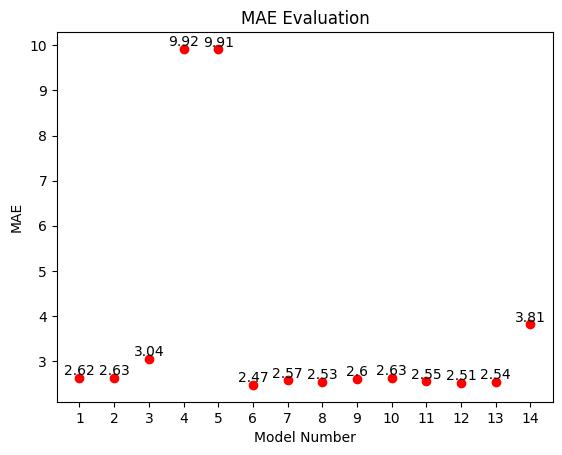

In [43]:
Models = ("1","2","3","4","5","6","7","8","9","10","11","12","13","14")
Mae = (2.62,2.63,3.04,9.92,9.91,2.47,2.57,2.53,2.60,2.63,2.55,2.51,2.54,3.81)

# MAE Evaluation
plt.scatter(Models, Mae, color="red")
plt.title("MAE Evaluation")
plt.xlabel("Model Number")
plt.ylabel("MAE")

for (xi, yi) in zip(Models,Mae):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.show()

